## K-means et CAH avec Python - Tutoriel de Eric Rakotomalala

Tutoriel disponible à ici : http://eric.univ-lyon2.fr/~ricco/cours/didacticiels/Python/cah_kmeans_avec_python.pdf  

&nbsp;


Les données sont disponibles à cet emplacement : http://www.math.u-bordeaux.fr/~mchave100p/teaching/

&nbsp;

[REQUIREMENTS.txt](#requirements)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn import cluster, metrics

In [2]:
df = pd.read_table("../data/csv-txt/fromages/fromage.txt")

In [3]:
df.head()

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [4]:
df.rename(columns={"Fromages":"fromages"}, inplace=True)

In [5]:
df.head()

,fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [6]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fromages     29 non-null     object 
 1   calories     29 non-null     int64  
 2   sodium       29 non-null     float64
 3   calcium      29 non-null     float64
 4   lipides      29 non-null     float64
 5   retinol      29 non-null     float64
 6   folates      29 non-null     float64
 7   proteines    29 non-null     float64
 8   cholesterol  29 non-null     int64  
 9   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 4.0 KB


### 1. Analyse Univariée

Voir notebook 'cah fromage' pour l'analyse exploratoire détaillée

### 2. Analyse Bivariée

Voir notebook 'cah fromage' pour l'analyse exploratoire détaillée

### 3. Analyse Multivariée : K-means

&nbsp;

Pour effectuer les K-means, on utilise le package scikit-learn. On travaille sur les données centrées-réduites créées ci-avant.

In [7]:
## Standardisation

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
arr = sc.fit_transform(df.drop("fromages", axis=1))

In [8]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.__dict__

{'n_clusters': 4,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto'}

In [9]:
kmeans.fit(arr)
kmeans.__dict__

{'n_clusters': 4,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto',
 'n_features_in_': 9,
 '_n_threads': 8,
 '_n_init': 10,
 '_tol': 0.0001,
 '_algorithm': 'elkan',
 'cluster_centers_': array([[ 0.37923886,  0.53697029,  0.19595937,  0.41828696, -0.31639305,
         -0.4585096 ,  0.15494172,  0.32373943,  0.01594564],
        [-2.19545917, -1.54825548, -0.7294285 , -2.23874174, -0.52277108,
          0.30076596, -1.89639728, -2.02980539, -1.41307131],
        [ 0.85439738, -0.74620441,  1.30838923,  0.66364744, -0.12644103,
         -0.85857867,  1.30887213,  0.98772474,  1.65754892],
        [-0.13324903,  0.40107666, -1.06127721, -0.03654795,  1.19213203,
          1.58482731, -0.18799259, -0.22529235, -0.47644971]]),
 'labels_': array([3, 0, 2, 0, 3, 0, 3, 3, 0, 2, 3, 2, 2, 3, 0, 1, 1, 0, 0, 2, 1, 0,
        0, 0, 0, 0, 0,

In [10]:
## Tri des indices de classes

idk = np.argsort(kmeans.labels_)
idk

array([14,  1, 26,  3, 25,  5, 24, 23,  8, 22, 21, 18, 17, 27, 20, 16, 28,
       15, 12, 19, 11,  9,  2, 13, 10,  7,  6,  4,  0], dtype=int64)

In [11]:
pd.DataFrame({"Fromage":df.fromages[idk], "Groupe":kmeans.labels_[idk]})

,Fromage,Groupe
14,Fr.fondu.45,0
1,Babybel,0
26,Tome,0
3,Bleu,0
25,SaintPaulin,0
5,Cantal,0
24,Rocquefort,0
23,Reblochon,0
8,Cheddar,0
22,Pyrenees,0


In [12]:
## Calcul de la distance des individus aux centres de classes

d_i_G = kmeans.transform(arr)
d_i_G

array([[2.91923811, 5.52563871, 5.21699713, 2.22366092],
       [0.74374718, 5.19015189, 2.79338133, 3.0178739 ],
       [2.85539991, 7.50534896, 1.14539172, 5.16141204],
       [2.10536305, 6.12458901, 3.90039468, 3.23696124],
       [3.54292429, 5.40377152, 5.1027633 , 1.93343014],
       [1.19391692, 6.29601131, 2.20069332, 4.02486207],
       [3.38720801, 5.92595629, 4.53017038, 1.77869718],
       [3.45802005, 5.55487006, 5.09064158, 1.03237227],
       [1.95305264, 6.82455372, 2.29131322, 3.74803439],
       [3.42031134, 7.84252968, 1.35227289, 5.4424737 ],
       [2.48915384, 4.84286038, 4.74937695, 1.95795563],
       [2.25403853, 6.12567693, 1.34428719, 4.22922422],
       [3.39604145, 7.47787998, 0.90212763, 5.52630163],
       [5.54292312, 5.01044821, 7.09387676, 3.09730277],
       [1.88749301, 5.28233144, 4.44924466, 2.837017  ],
       [6.00270259, 0.682889  , 7.60942068, 5.33113973],
       [5.60590975, 1.00738319, 7.3223388 , 4.5471731 ],
       [1.52552562, 6.46351268,

In [13]:
## Détection du nombre "optimal" de classes
scr = []
K = np.arange(9)
for k in K:
    km = cluster.KMeans(n_clusters = k + 2)
    km.fit(arr)
    scr.append(km.inertia_)

scr

[147.72801758509752,
 101.15136839523838,
 73.00278330776283,
 60.949786030692316,
 51.74550473077586,
 45.29001478658667,
 43.073348448221125,
 36.318267984130806,
 31.76260254463706]

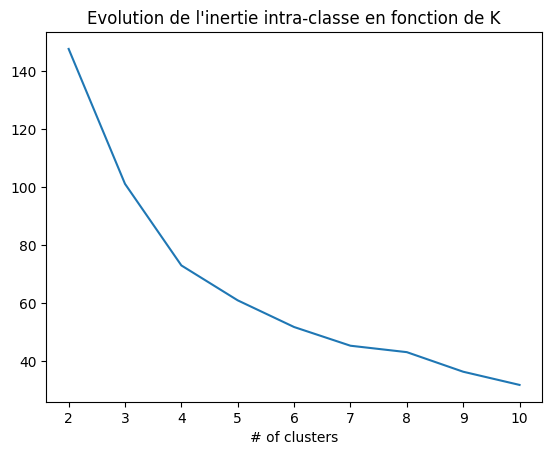

In [14]:
plt.title("Evolution de l'inertie intra-classe en fonction de K")
plt.xlabel("# of clusters")
plt.plot(K + 2, scr)
plt.show()

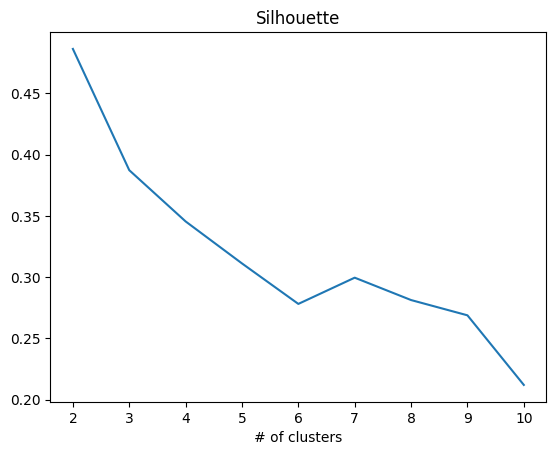

In [15]:
# Métrique silhouette

res= np.arange(9,dtype="double")
for k in K:
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(arr)
    res[k] = metrics.silhouette_score(arr,km.labels_)

plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(K + 2,res)
plt.show()

In [16]:
#moyenne par variable
m = df.mean()

print("Moyennes par variables \n")
print(m)
print("\n===========================================\n")

#TSS
TSS = df.shape[0]*df.var(ddof=0)
print(TSS)


Moyennes par variables 

calories       300.034483
sodium         210.086207
calcium        185.734483
lipides         24.158621
retinol         67.562069
folates         13.010345
proteines       20.168966
cholesterol     74.586207
magnesium       26.965517
dtype: float64


calories       236550.965517
sodium         330711.034483
calcium        147292.285517
lipides          1850.550345
retinol         16347.948276
folates          3848.226897
proteines        1356.282069
cholesterol     22339.034483
magnesium        3586.965517
dtype: float64


C:\Users\Nelly\AppData\Local\Temp\ipykernel_15876\140389834.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m = df.mean()
C:\Users\Nelly\AppData\Local\Temp\ipykernel_15876\140389834.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TSS = df.shape[0]*df.var(ddof=0)


In [17]:
# Interprétation des classes (univariée)

#dataframe conditionnellement aux groupes
gb_km = df.groupby(kmeans.labels_)

#effectifs conditionnels
nk_km= gb_km.size()

#moyennes conditionnelles
mk_km= gb_km.mean()

print("Moyennes conditionnelles aux groupes \n")
print(mk_km)
print("\n===========================================\n")

#pour chaque groupe, écart à la moyenne par variable
EMk_km= (mk_km - m)**2

#pondéré par les effectifs du groupe
EM_km = EMk_km.multiply(nk_km,axis=0)

#somme des valeurs => BSS
BSS_km = np.sum(EM_km,axis=0)

#carré du rapport de corrélation
eta2_km = BSS_km/TSS

print("Part de la variance totale expliquée par l'appartenance aux groupes \n")
print(eta2_km.sort_values(ascending=False))

Moyennes conditionnelles aux groupes 

     calories      sodium  calcium    lipides    retinol    folates  \
0  334.285714  267.428571   199.70  27.500000  60.050000   7.728571   
1  101.750000   44.750000   133.75   6.275000  55.150000  16.475000   
2  377.200000  130.400000   278.98  29.460000  64.560000   3.120000   
3  288.000000  252.916667   110.10  23.866667  95.866667  31.266667   

   proteines  cholesterol  magnesium  
0  21.228571    83.571429  27.142857  
1   7.200000    18.250000  11.250000  
2  29.120000   102.000000  45.400000  
3  18.883333    68.333333  21.666667  


Part de la variance totale expliquée par l'appartenance aux groupes 

calories       0.863799
lipides        0.851983
proteines      0.810316
cholesterol    0.797596
magnesium      0.796207
folates        0.760722
calcium        0.620108
sodium         0.599117
retinol        0.382815
dtype: float64


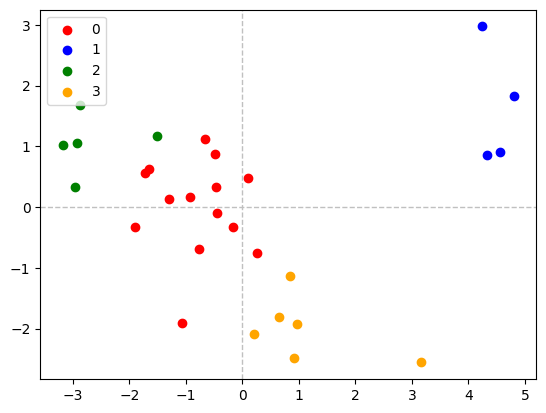

In [20]:
## Affichage des classes dans le 1er plan factoriel

coords = PCA(svd_solver="full").fit_transform(arr)

for couleur, k in zip(['red','blue','green','orange'], np.unique(kmeans.labels_)):
    plt.scatter(coords[kmeans.labels_ == k , 0], coords[kmeans.labels_ == k, 1], c=couleur, label=k)

plt.legend()
plt.axvline(0, color="silver", linestyle="dashed", linewidth=1)
plt.axhline(0, color="silver", linestyle="dashed", linewidth=1)
plt.show()

## <a id="requirements" style="color:black">REQUIREMENTS.txt</a>

<span style="color:orange">Ce notebook a été créé avec python 3.8</span>

Requirements.txt  

```
absl-py==2.1.0
anyio==4.0.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0       
arrow==1.2.3
asttokens==2.4.0
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cachetools==4.2.4
certifi==2023.7.22
cffi==1.15.1
charset-normalizer==2.0.12
colorama==0.4.6
comm==0.1.4
cycler==0.11.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.3
executing==1.2.0
fastjsonschema==2.18.0
fonttools==4.42.1
fqdn==1.5.1
gast==0.3.3
google-auth==1.35.0
google-auth-oauthlib==0.4.6        
google-pasta==0.2.0
grpcio==1.66.2
h5py==2.10.0
htmlmin==0.1.12
idna==3.4
ImageHash==4.3.1
importlib-metadata==8.5.0
importlib-resources==6.4.5
ipykernel==6.25.2
ipython==8.12.0
ipython-genutils==0.2.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.0
Jinja2==3.1.2
joblib==1.1.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.0
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter-client==8.3.1
jupyter-console==6.6.3
jupyter-core==5.3.1
jupyter-events==0.7.0
jupyter-lsp==2.2.0
jupyter-server==2.7.3
jupyter-server-terminals==0.4.4
jupyterlab==4.0.6
jupyterlab-pygments==0.2.2
jupyterlab-server==2.25.0
jupyterlab-widgets==3.0.9
Keras==2.4.3
Keras-Preprocessing==1.1.2
kiwisolver==1.4.5
Markdown==3.7
MarkupSafe==2.1.3
matplotlib==3.5.3
matplotlib-inline==0.1.6
missingno==0.5.2
mistune==3.0.1
multimethod==1.8
nbclient==0.8.0
nbconvert==7.8.0
nbformat==5.9.2
nest-asyncio==1.5.8
networkx==3.1
notebook==7.0.3
notebook-shim==0.2.3
numpy==1.22.0
oauthlib==3.2.2
opt-einsum==3.4.0
overrides==7.4.0
packaging==23.1
pandas==1.4.0
pandas-profiling==3.3.0
pandocfilters==1.5.0
parso==0.8.3
patsy==0.5.3
pexpect==4.8.0
phik==0.12.3
pickleshare==0.7.5
Pillow==10.0.1
pkgutil-resolve-name==1.3.10
platformdirs==3.10.0
prometheus-client==0.17.1
prompt-toolkit==3.0.39
protobuf==3.20.3
psutil==5.9.5
ptyprocess==0.7.0
pure-eval==0.2.2
pyasn1==0.6.1
pyasn1-modules==0.4.1
pycparser==2.21
pydantic==1.9.2
Pygments==2.16.1
pyparsing==3.1.1
python-dateutil==2.8.2
python-json-logger==2.0.7
pytz==2023.3.post1
PyWavelets==1.4.1
pywin32==306
pywinpty==2.0.13
PyYAML==6.0.1
pyzmq==25.1.1
qtconsole==5.4.4
QtPy==2.4.0
referencing==0.30.2
requests==2.28.0
requests-oauthlib==2.0.0
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
rpds-py==0.10.3
rsa==4.9
scikit-learn==0.23.2
scipy==1.4.1
seaborn==0.11.2
Send2Trash==1.8.2
six==1.16.0
sniffio==1.3.0
soupsieve==2.5
stack-data==0.6.2
statsmodels==0.13.5
tangled-up-in-unicode==0.2.0
tensorboard==2.2.2
tensorboard-plugin-wit==1.8.1
tensorflow==2.2.0
tensorflow-estimator==2.2.0
termcolor==2.4.0
terminado==0.17.1
threadpoolctl==3.5.0
tinycss2==1.2.1
tomli==2.0.1
tornado==6.3.3
tqdm==4.64.1
traitlets==5.10.0
typing-extensions==4.7.1
uri-template==1.3.0
urllib3==1.26.16
visions==0.7.5
wcwidth==0.2.6
webcolors==1.13
webencodings==0.5.1
websocket-client==1.6.3
werkzeug==3.0.4
widgetsnbextension==4.0.9
wrapt==1.16.0
xlrd==2.0.1
zipp==3.20.2
```